<a href="https://colab.research.google.com/github/dnesemgithb/CS4410/blob/main/Ex_15_18_Determine_k_in_k_Means_Clustering_%26_MNIST_15_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
X = iris.data
print("Num samples:", X.shape[0])
print("Num features:",X.shape[1])

Num samples: 150
Num features: 4


In [8]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


In [18]:
print("WCSS (inertia_) vals:")
for k, val in enumerate(wcss, start=1):
  print(f"k = {k:2d} ->{val:8.2f}")

WCSS (inertia_) vals:
k =  1 ->  681.37
k =  2 ->  152.35
k =  3 ->   78.85
k =  4 ->   57.23
k =  5 ->   46.46
k =  6 ->   39.04
k =  7 ->   34.31
k =  8 ->   30.13
k =  9 ->   28.29
k = 10 ->   25.97


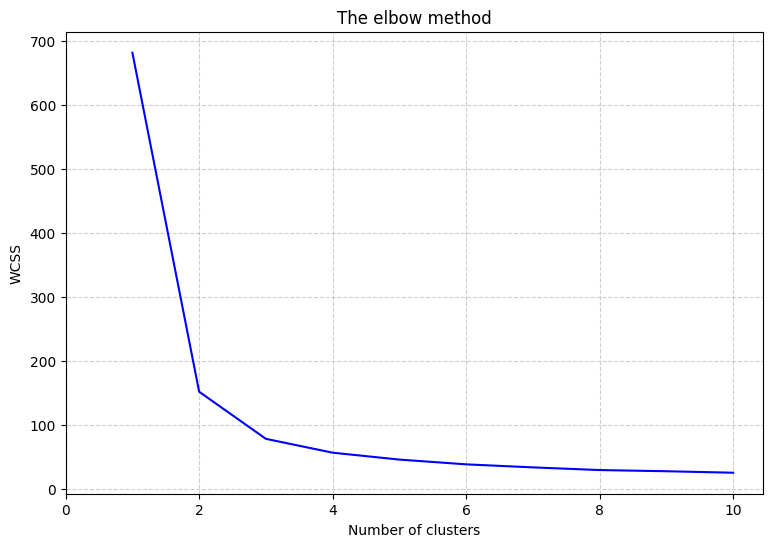

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(range(1,11), wcss,color='b',linestyle='-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(0, 11,2))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [47]:
#PART 2

In [48]:
from sklearn.datasets import fetch_openml

In [54]:
print ("loading MNIST")
mnist = fetch_openml('mnist_784')

loading MNIST


In [59]:
X = mnist.data
y = mnist.target.astype(int)

print("num images:", X.shape[0])
print("each image has:", X.shape[1],"pixels")
print("first 8 labels\n", y[:8])

num images: 70000
each image has: 784 pixels
first 8 labels
 0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
Name: class, dtype: int64


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Training Pics:", X_train.shape[0])
print('Testing pics:', X_test.shape[0])

Training Pics: 56000
Testing pics: 14000


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
#no PCA logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

print("training without pca...")
start_time = time.time()
model = LogisticRegression(solver='lbfgs',max_iter=500,n_jobs=-1,random_state=11)
model.fit(X_train_scaled, y_train)
time_normal = time.time() - start_time
predictions = model.predict(X_test_scaled)
accuracy_normal = accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy_normal:.4f}")
print(f"Time taken: {time_normal:.1f} secs")

training without pca...
Accuracy: 0.9163
Time taken: 77.6 secs


In [67]:
#Logistic regression with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original number of pixles per image:", X_train_scaled.shape[1])
print('After PCA - num of features kept:', X_train_pca.shape[1])
print("Percentage of info kept:", round(pca.explained_variance_ratio_.sum()*100,1), "%")

Original number of pixles per image: 784
After PCA - num of features kept: 330
Percentage of info kept: 95.0 %


In [76]:
print("Training with PCA...")
start_time = time.time()
model_pca = LogisticRegression(solver='lbfgs',max_iter=500,n_jobs=-1,random_state=11)
model_pca.fit(X_train_pca, y_train)

time_pca = time.time() - start_time

predictions_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Time taken: {time_pca:.1f} seconds")


Training with PCA...
Accuracy: 0.9163
Time taken: 38.4 seconds


In [77]:
print(f"Without PCA: accuracy = {accuracy_normal:.4f}  |  time = {time_normal:.1f} seconds")
print(f"With PCA: accuracy = {accuracy_pca:.4f}  |  time = {time_pca:.1f} seconds")
print(f"Speed improvement: ~ {time_normal / time_pca:.1f} times faster")

Without PCA: accuracy = 0.9163  |  time = 77.6 seconds
With PCA: accuracy = 0.9163  |  time = 38.4 seconds
Speed improvement: ~ 2.0 times faster
